In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv('PJME_hourly.csv')

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['PJME_MW']=scaler.fit_transform(df['PJME_MW'].values.reshape(-1,1))
    return df

df = normalize_data(df)


In [3]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,0.251849
1,2002-12-31 02:00:00,0.223386
2,2002-12-31 03:00:00,0.211314
3,2002-12-31 04:00:00,0.207500
4,2002-12-31 05:00:00,0.217339
...,...,...
145361,2018-01-01 20:00:00,0.626567
145362,2018-01-01 21:00:00,0.615338
145363,2018-01-01 22:00:00,0.586917
145364,2018-01-01 23:00:00,0.539766


In [4]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [5]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,0.251849
2002-12-31 02:00:00,0.223386
2002-12-31 03:00:00,0.211314
2002-12-31 04:00:00,0.207500
2002-12-31 05:00:00,0.217339
...,...
2018-01-01 20:00:00,0.626567
2018-01-01 21:00:00,0.615338
2018-01-01 22:00:00,0.586917


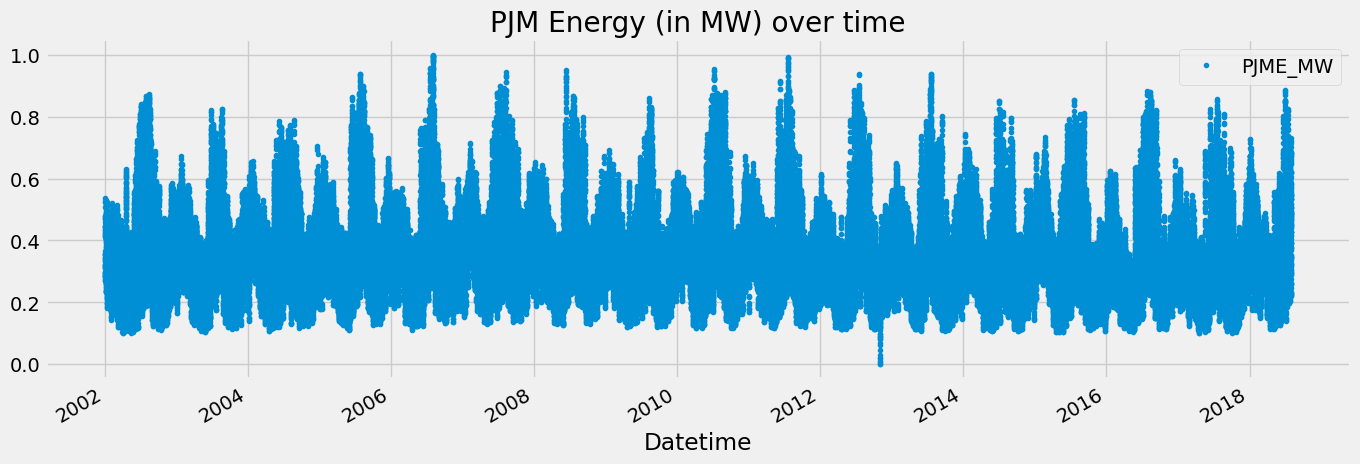

In [6]:
df.plot(style='.',
        figsize=(15, 5),
        title='PJM Energy (in MW) over time')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.PJME_MW)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -18.828913
p-value: 0.000000


In [8]:
result

(-18.828912729084177,
 2.0221245081527322e-30,
 74,
 145291,
 {'1%': -3.430395009088914,
  '5%': -2.861559893380481,
  '10%': -2.5667805885384065},
 -832379.3367561738)

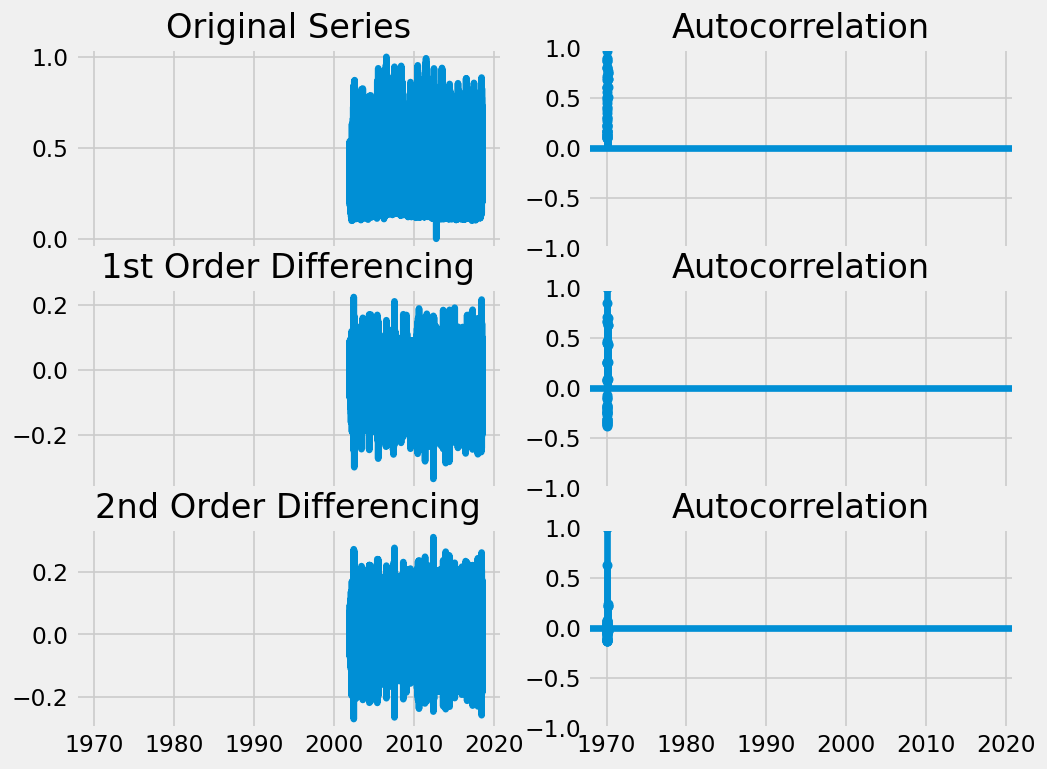

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.PJME_MW); axes[0, 0].set_title('Original Series')
plot_acf(df.PJME_MW, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.PJME_MW.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.PJME_MW.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.PJME_MW.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.PJME_MW.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

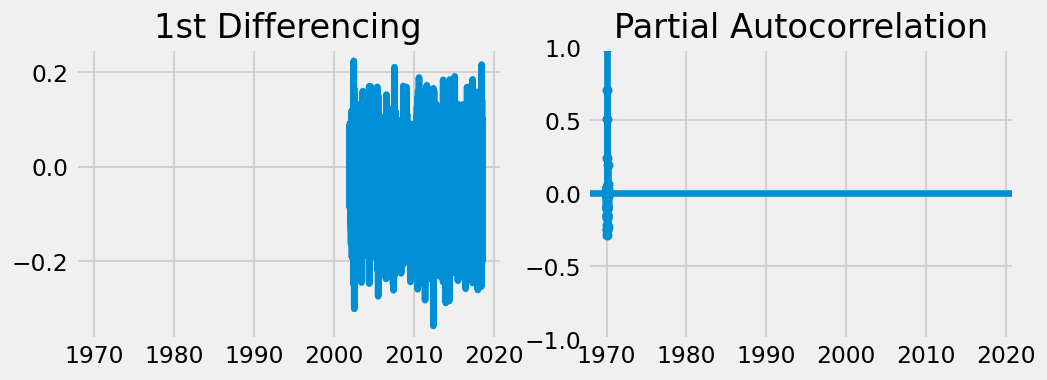

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.PJME_MW.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.PJME_MW.diff().dropna(), ax=axes[1])

plt.show()

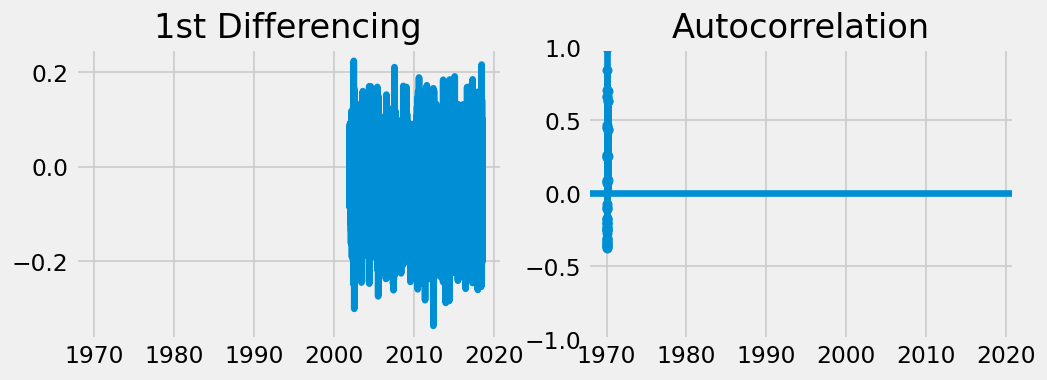

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.PJME_MW.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.PJME_MW.diff().dropna(), ax=axes[1])

plt.show()


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.PJME_MW, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                PJME_MW   No. Observations:               145366
Model:                 ARIMA(1, 1, 1)   Log Likelihood              339943.463
Date:                Sun, 07 Apr 2024   AIC                        -679880.926
Time:                        14:17:38   BIC                        -679851.265
Sample:                             0   HQIC                       -679872.073
                             - 145366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6713      0.002    319.882      0.000       0.667       0.675
ma.L1          0.0788      0.003     29.437      0.000       0.074       0.084
sigma2         0.0005   9.25e-07    589.272      0.0

In [13]:
l = 100
# Predict h steps ahead (adjust h as needed)
predictions = model_fit.predict()


In [14]:
df.PJME_MW

Datetime
2002-12-31 01:00:00    0.251849
2002-12-31 02:00:00    0.223386
2002-12-31 03:00:00    0.211314
2002-12-31 04:00:00    0.207500
2002-12-31 05:00:00    0.217339
                         ...   
2018-01-01 20:00:00    0.626567
2018-01-01 21:00:00    0.615338
2018-01-01 22:00:00    0.586917
2018-01-01 23:00:00    0.539766
2018-01-02 00:00:00    0.506984
Name: PJME_MW, Length: 145366, dtype: float64

In [15]:
predictions


Datetime
2002-12-31 01:00:00    0.000000
2002-12-31 02:00:00    0.251849
2002-12-31 03:00:00    0.203170
2002-12-31 04:00:00    0.203850
2002-12-31 05:00:00    0.205228
                         ...   
2018-01-01 20:00:00    0.627432
2018-01-01 21:00:00    0.625664
2018-01-01 22:00:00    0.606985
2018-01-01 23:00:00    0.566256
2018-01-02 00:00:00    0.506026
Name: predicted_mean, Length: 145366, dtype: float64

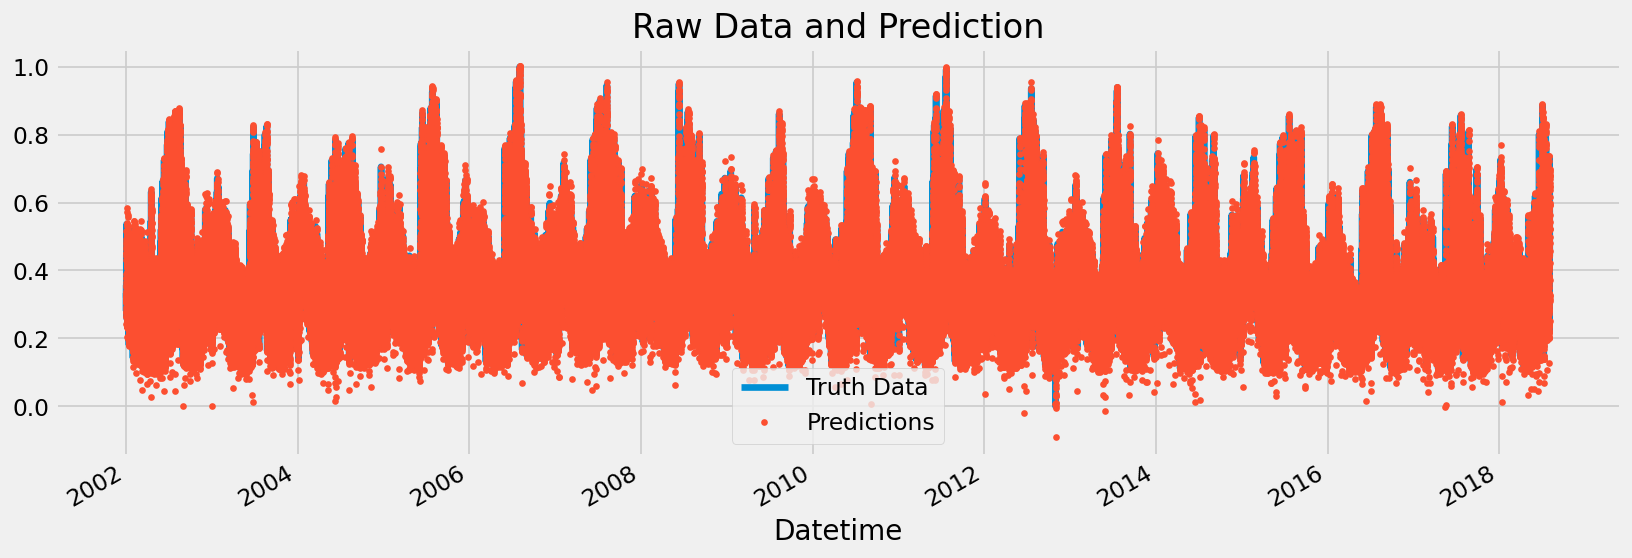

In [16]:
ax = df[['PJME_MW']].plot(figsize=(15, 5))
predictions.plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error,r2_score
rmse_score_arima = np.sqrt(mean_squared_error(df['PJME_MW'], predictions))
print(f'RMSE Score on Test set: {rmse_score_arima:0.2f}')
r2_score_arima = r2_score(df['PJME_MW'],predictions)
print("R2 Score of Xgboost model = ",r2_score_arima)

RMSE Score on Test set: 0.02
R2 Score of Xgboost model =  0.9705980250577957
